# <font color = "gray" > <b><i>Income & Spent Analysis using Hierarchical Clustering</b>
<b><i>NAKKA SHEKHAR</b>
* [linkedin](https://www.linkedin.com/in/nakka-shekhar-2019a987/)
* [github](https://github.com/shekhar443/MACHINE-LEARNING-PROJECT)

### Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Data Profiling / Data Loading

In [2]:
df=pd.read_csv("ML/dataset20.csv")

### Summarize Dataset

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [5]:
df.shape

(200, 5)

In [6]:
df.size

1000

In [7]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score'], dtype='object')

In [8]:
df.dtypes

CustomerID             int64
Gender                object
Age                    int64
Annual Income (k$)     int64
Spending Score         int64
dtype: object

### Check Null Values and Duplicate Values

In [9]:
df.isnull().sum()

CustomerID            0
Gender                0
Age                   0
Annual Income (k$)    0
Spending Score        0
dtype: int64

In [10]:
df.duplicated().sum()

0

### Statistical Analysis of data

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Gender              200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual Income (k$)  200 non-null    int64 
 4   Spending Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [12]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### EDA and FE

In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.Gender=le.fit_transform(df.Gender)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


### Dendrogram Data visualization

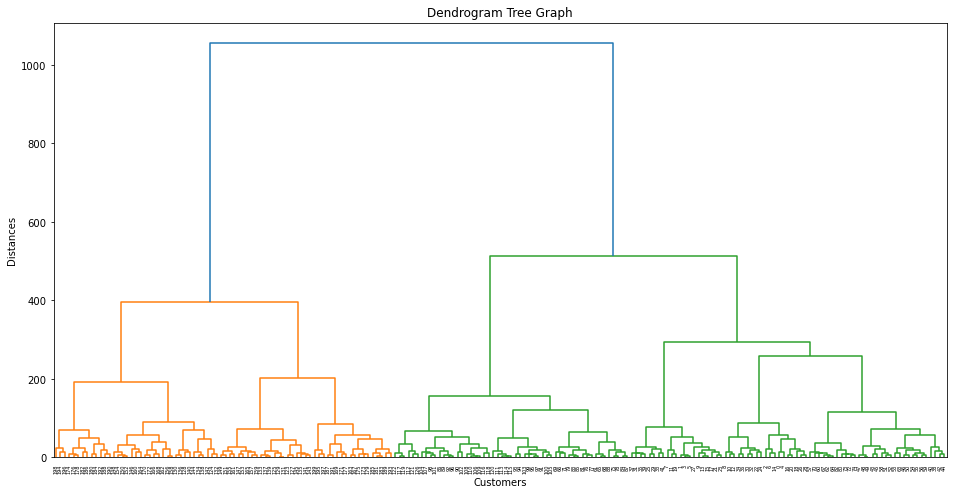

In [14]:
import scipy.cluster.hierarchy as clus

plt.figure(1, figsize = (16 ,8))
dendrogram = clus.dendrogram(clus.linkage(df, method  = "ward"))

plt.title('Dendrogram Tree Graph')
plt.xlabel('Customers')
plt.ylabel('Distances')
plt.show()

### Fitting the Hierarchial clustering to the dataset with n=5

In [15]:
from sklearn.cluster import AgglomerativeClustering 
model = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage ='average')
y_means = model.fit_predict(df)
y_means

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 2,
       3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int64)

### Visualizing the number of clusters n=5

Cluster 1: Customers with Medium Income and Medium Spending

Cluster 2: Customers with High Income and High Spending

Cluster 3: Customers with Low Income and Low Spending

Cluster 4: Customers with High Income and Low Spending

Cluster 5: Customers with Low Income and High Spending

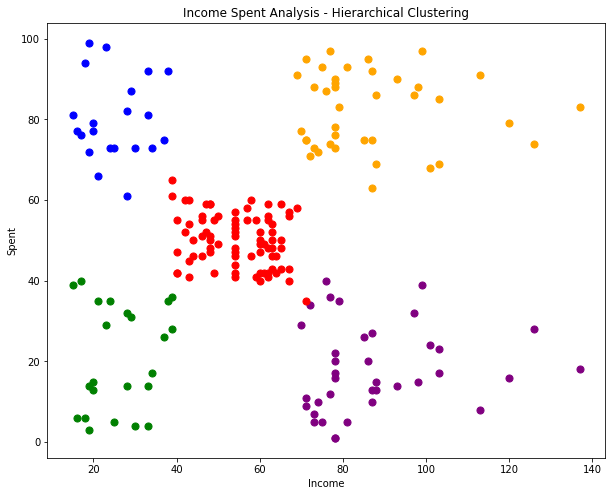

In [16]:
plt.figure(1, figsize = (10 ,8))
X = df.iloc[:, [3,4]].values
plt.scatter(X[y_means==0, 0], X[y_means==0, 1], s=50, c='purple', label ='Cluster 1')
plt.scatter(X[y_means==1, 0], X[y_means==1, 1], s=50, c='orange', label ='Cluster 2')
plt.scatter(X[y_means==2, 0], X[y_means==2, 1], s=50, c='red', label ='Cluster 3')
plt.scatter(X[y_means==3, 0], X[y_means==3, 1], s=50, c='green', label ='Cluster 4')
plt.scatter(X[y_means==4, 0], X[y_means==4, 1], s=50, c='blue', label ='Cluster 5')
plt.title('Income Spent Analysis - Hierarchical Clustering')
plt.xlabel('Income')
plt.ylabel('Spent')
plt.show()